# Analysis of customer preferences in car purchases

The aim of the project Analysis of customer preferences in car purchases is to understand the key factors that influence customers' purchasing decisions when choosing cars. The analysis includes examining the popularity of various brands, models, colors and body types, as well as examining how gender, income and region affect purchasing preferences. The results of this analysis can help dealers and manufacturers better match their offerings to market needs and target marketing strategies more effectively.

Pytania badawcze na podstawie dostępnych danych:

1 Jakie marki i modele samochodów są najczęściej kupowane?
-Które marki (kolumna Company) i modele (kolumna Model) są najczęściej wybierane przez klientów?
-Czy istnieją różnice w popularności marek w zależności od regionu sprzedaży (Dealer_Region)?

2 Jakie preferencje kolorystyczne mają klienci przy wyborze samochodów?
-Jakie kolory samochodów (kolumna Color) cieszą się największą popularnością?
-Czy kolory samochodów różnią się w zależności od regionu lub modelu samochodu?

3 Jakie typy nadwozia są najczęściej wybierane?
-Które typy nadwozia (kolumna Body Style) są preferowane przez klientów?
-Czy wybory dotyczące typu nadwozia różnią się w zależności od dochodów klientów (kolumna Annual Income)?

4 Czy płeć klienta wpływa na wybory zakupowe?
-Jakie modele, marki i kolory samochodów są popularne wśród mężczyzn, a jakie wśród kobiet (kolumna Gender)?
-Czy istnieje różnica w wyborze typu nadwozia w zależności od płci?

5 Jak dochód klienta wpływa na wybór samochodu?
-Czy istnieje korelacja między dochodami (kolumna Annual Income) a ceną samochodu (kolumna Price ($))?
-Jak dochody klientów wpływają na wybór marki, modelu, koloru lub typu nadwozia?

6 Jak region sprzedaży wpływa na wybory klientów?
-Czy klienci z różnych regionów (Dealer_Region) wybierają inne marki, modele, kolory lub typy nadwozia?
-Jak różni się średnia cena samochodów sprzedawanych w poszczególnych regionach?

7 Jakie preferencje zakupowe mają klienci w zależności od rodzaju silnika i skrzyni biegów?
-Które typy silników (kolumna Engine) i skrzyń biegów (kolumna Transmission) są najczęściej wybierane?
-Czy istnieją różnice w wyborze rodzaju silnika i skrzyni biegów w zależności od płci, dochodu lub regionu?

8 Jakie czynniki wpływają na cenę samochodu?
-Czy cena samochodu (kolumna Price ($)) zależy od marki, modelu, typu nadwozia, koloru lub regionu?
-Jakie czynniki mają największy wpływ na różnice w cenach?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
!pip install plotly

In [3]:
import plotly.express as px

In [4]:
data = pd.read_csv("Car Sales.xlsx - car_data.csv")

In [5]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
data.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [8]:
missing_customer_name = data[data['Customer Name'].isna()]
print(missing_customer_name)


            Car_id       Date Customer Name Gender  Annual Income  \
7564  C_CND_007565  11/5/2022           NaN   Male         680000   

           Dealer_Name Company       Model                     Engine  \
7564  Saab-Belle Dodge   Dodge  Ram Pickup  DoubleÂ Overhead Camshaft   

     Transmission       Color  Price ($)  Dealer_No  Body Style    Phone  \
7564         Auto  Pale White      45000  60504-7114    Hardtop  7203103   

     Dealer_Region  
7564        Aurora  


# I don't need the customer's name for this analysis, so I will leave this row in the database.

In [9]:
print(data.dtypes)

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object


# First task

In [10]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']
print(company_counts)

       Company  Count
0    Chevrolet   1819
1        Dodge   1671
2         Ford   1614
3   Volkswagen   1333
4   Mercedes-B   1285
5   Mitsubishi   1277
6     Chrysler   1120
7   Oldsmobile   1111
8       Toyota   1110
9       Nissan    886
10     Mercury    874
11       Lexus    802
12     Pontiac    796
13         BMW    790
14       Volvo    789
15       Honda    708
16       Acura    689
17    Cadillac    652
18    Plymouth    617
19      Saturn    586
20     Lincoln    492
21        Audi    468
22       Buick    439
23      Subaru    405
24        Jeep    363
25     Porsche    361
26     Hyundai    264
27        Saab    210
28    Infiniti    195
29      Jaguar    180


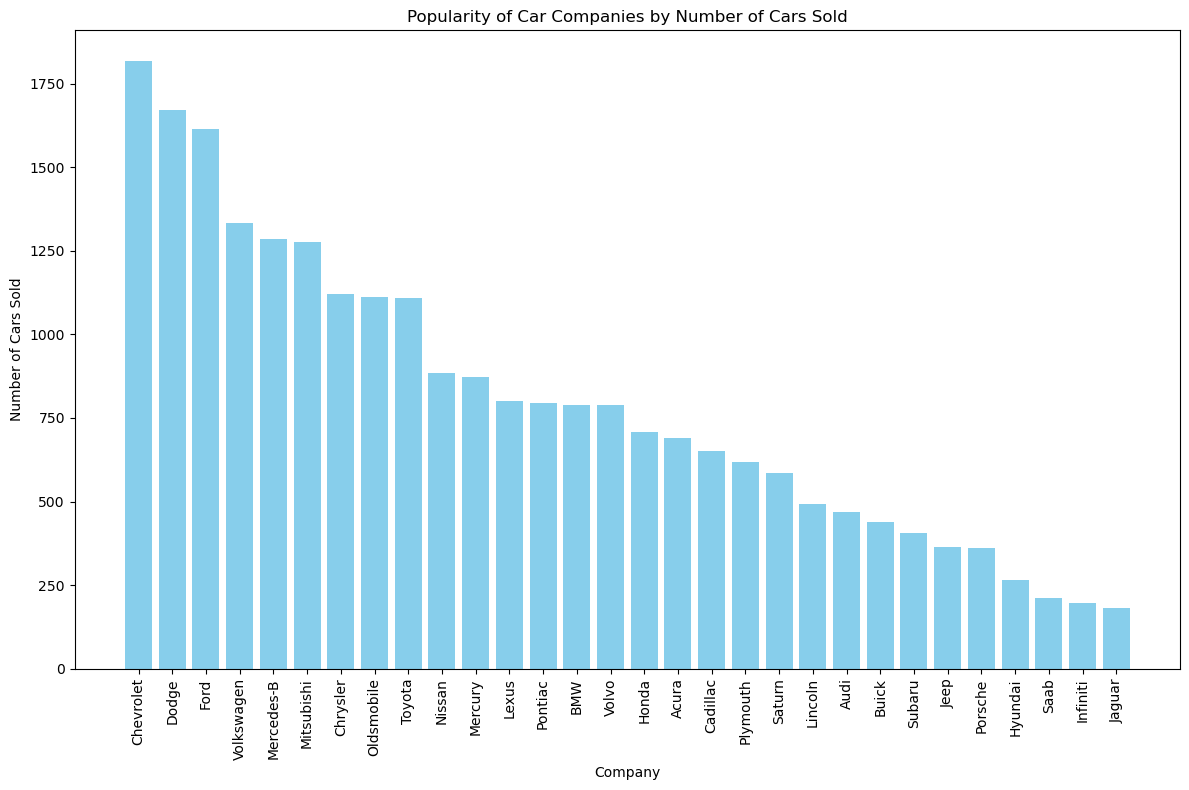

In [11]:
company_counts = {
    'Company': ['Chevrolet', 'Dodge', 'Ford', 'Volkswagen', 'Mercedes-B', 'Mitsubishi', 'Chrysler', 'Oldsmobile', 
                'Toyota', 'Nissan', 'Mercury', 'Lexus', 'Pontiac', 'BMW', 'Volvo', 'Honda', 'Acura', 'Cadillac', 
                'Plymouth', 'Saturn', 'Lincoln', 'Audi', 'Buick', 'Subaru', 'Jeep', 'Porsche', 'Hyundai', 'Saab', 
                'Infiniti', 'Jaguar'],
    'Count': [1819, 1671, 1614, 1333, 1285, 1277, 1120, 1111, 1110, 886, 874, 802, 796, 790, 789, 708, 689, 652, 
              617, 586, 492, 468, 439, 405, 363, 361, 264, 210, 195, 180]
}

plt.figure(figsize=(12, 8))
plt.bar(company_counts['Company'], company_counts['Count'], color='skyblue')
plt.title('Popularity of Car Companies by Number of Cars Sold')
plt.xlabel('Company')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
max_company = company_counts.nlargest(1, 'Count')
print(max_company)

AttributeError: 'dict' object has no attribute 'nlargest'

In [13]:
company_model_counts = data.groupby(['Company', 'Model']).size().reset_index(name='Model_Count')

In [14]:
most_common_model = company_model_counts.loc[company_model_counts.groupby('Company')['Model_Count'].idxmax()]

In [15]:
company_counts_with_model = pd.merge(company_counts, most_common_model[['Company', 'Model', 'Model_Count']], on='Company')

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [16]:
print(company_counts_with_model)

NameError: name 'company_counts_with_model' is not defined

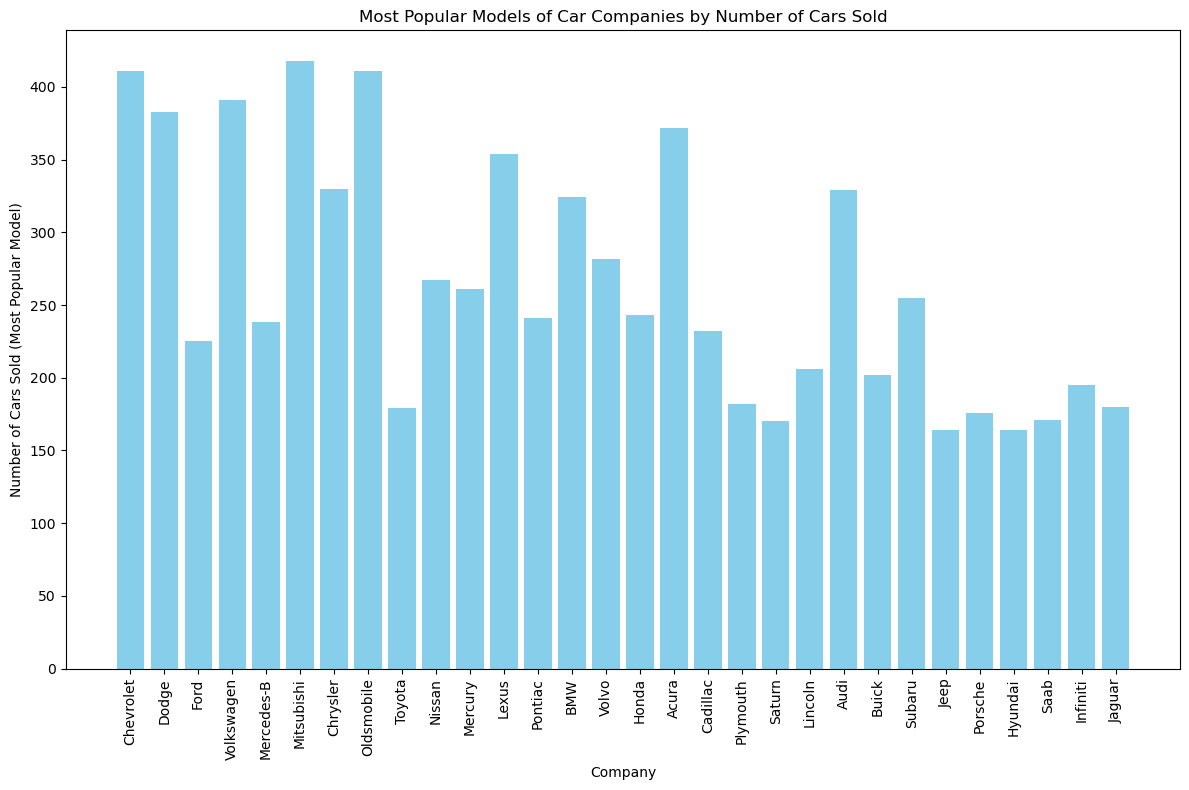

In [17]:
company_model_counts = {
    'Company': ['Chevrolet', 'Dodge', 'Ford', 'Volkswagen', 'Mercedes-B', 'Mitsubishi', 'Chrysler', 'Oldsmobile', 
                'Toyota', 'Nissan', 'Mercury', 'Lexus', 'Pontiac', 'BMW', 'Volvo', 'Honda', 'Acura', 'Cadillac', 
                'Plymouth', 'Saturn', 'Lincoln', 'Audi', 'Buick', 'Subaru', 'Jeep', 'Porsche', 'Hyundai', 'Saab', 
                'Infiniti', 'Jaguar'],
    'Model_Count': [411, 383, 225, 391, 238, 418, 330, 411, 179, 267, 261, 354, 241, 324, 282, 243, 372, 232, 182, 
                    170, 206, 329, 202, 255, 164, 176, 164, 171, 195, 180]
}

plt.figure(figsize=(12, 8))
plt.bar(company_model_counts['Company'], company_model_counts['Model_Count'], color='skyblue')
plt.title('Most Popular Models of Car Companies by Number of Cars Sold')
plt.xlabel('Company')
plt.ylabel('Number of Cars Sold (Most Popular Model)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
region_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')
most_common_models_in_regions = region_model_counts.loc[region_model_counts.groupby('Dealer_Region')['Count'].idxmax()]
print(most_common_models_in_regions)


     Dealer_Region     Company       Model  Count
94          Aurora  Mitsubishi    Diamante     64
181         Austin   Chevrolet       Prizm     96
458     Greenville  Volkswagen      Passat     55
491     Janesville   Chevrolet       Prizm     81
660     Middletown       Dodge  Ram Pickup     59
868          Pasco  Mitsubishi    Diamante     58
1077    Scottsdale  Volkswagen      Passat     76


In [19]:
!pip install folium

In [20]:
import folium

coordinates = {
    'Aurora': {'Latitude': 39.7294, 'Longitude': -104.8319},
    'Austin': {'Latitude': 30.2672, 'Longitude': -97.7431},
    'Greenville': {'Latitude': 34.8526, 'Longitude': -82.3940},
    'Janesville': {'Latitude': 42.6828, 'Longitude': -89.0187},
    'Middletown': {'Latitude': 39.5151, 'Longitude': -84.3983},
    'Pasco': {'Latitude': 46.2396, 'Longitude': -119.1006},
    'Scottsdale': {'Latitude': 33.4942, 'Longitude': -111.9261}
}

most_common_models_in_regions['Latitude'] = most_common_models_in_regions['Dealer_Region'].map(lambda x: coordinates[x]['Latitude'])
most_common_models_in_regions['Longitude'] = most_common_models_in_regions['Dealer_Region'].map(lambda x: coordinates[x]['Longitude'])

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

for index, row in most_common_models_in_regions.iterrows():
    popup_text = f"Region: {row['Dealer_Region']}<br>Company: {row['Company']}<br>Model: {row['Model']}<br>Count: {row['Count']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m


# Second Task


In [21]:
color_popularity = data.groupby('Color').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print(color_popularity)


        Color  Count
1  Pale White  11256
0       Black   7857
2         Red   4793


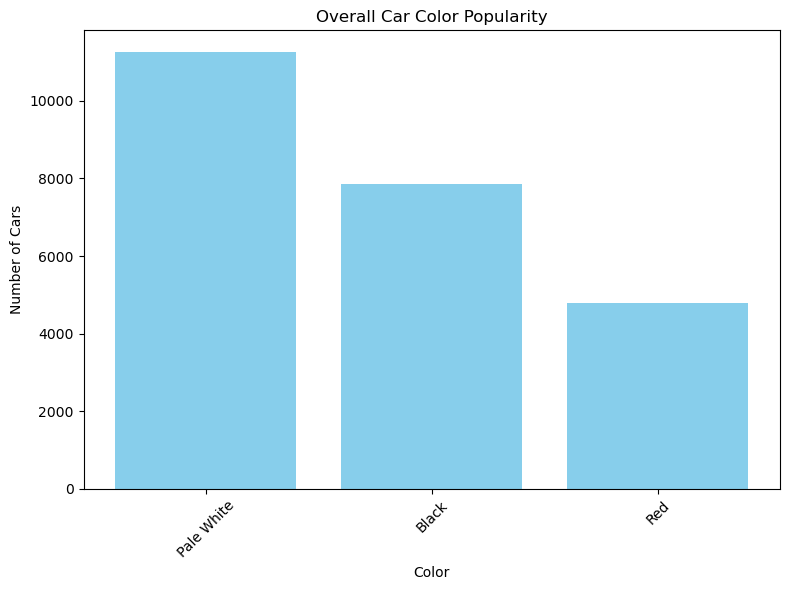

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(color_popularity['Color'], color_popularity['Count'], color='skyblue')
plt.title('Overall Car Color Popularity')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
color_count_by_region = data.groupby(['Dealer_Region', 'Color']).size().reset_index(name='Count')

print(color_count_by_region)


   Dealer_Region       Color  Count
0         Aurora       Black   1012
1         Aurora  Pale White   1496
2         Aurora         Red    622
3         Austin       Black   1364
4         Austin  Pale White   1937
5         Austin         Red    834
6     Greenville       Black   1052
7     Greenville  Pale White   1467
8     Greenville         Red    609
9     Janesville       Black   1249
10    Janesville  Pale White   1807
11    Janesville         Red    765
12    Middletown       Black    999
13    Middletown  Pale White   1461
14    Middletown         Red    668
15         Pasco       Black   1037
16         Pasco  Pale White   1472
17         Pasco         Red    622
18    Scottsdale       Black   1144
19    Scottsdale  Pale White   1616
20    Scottsdale         Red    673


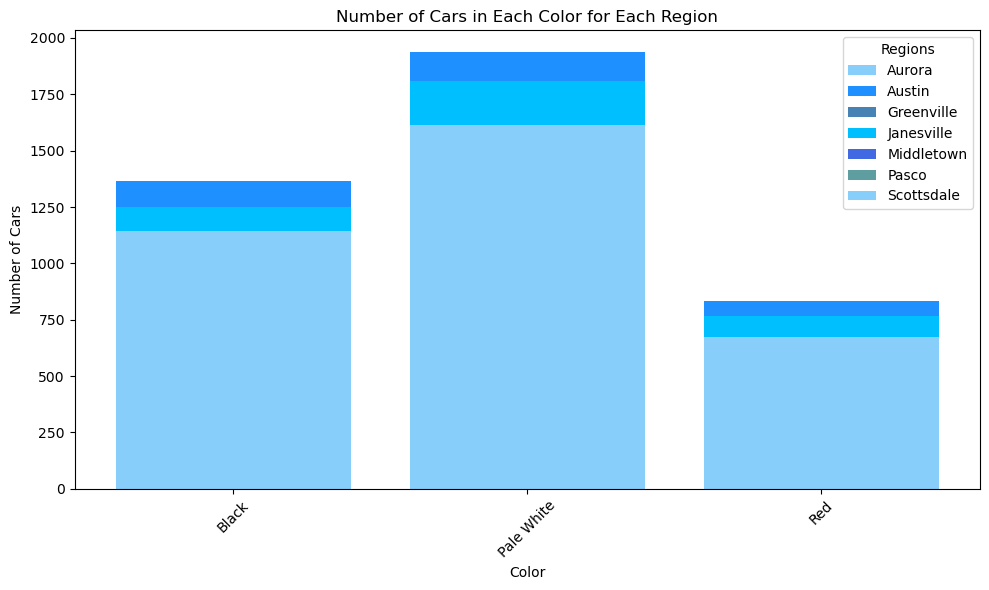

In [24]:
blue_shades = ['#87CEFA', '#1E90FF', '#4682B4', '#00BFFF', '#4169E1', '#5F9EA0']

plt.figure(figsize=(10, 6))
regions = color_count_by_region['Dealer_Region'].unique()

for i, region in enumerate(regions):
    region_data = color_count_by_region[color_count_by_region['Dealer_Region'] == region]
    plt.bar(region_data['Color'], region_data['Count'], label=region, color=blue_shades[i % len(blue_shades)])

plt.title('Number of Cars in Each Color for Each Region')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
region_model_counts = data.groupby(['Dealer_Region', 'Company', 'Model']).size().reset_index(name='Count')
most_common_models_in_regions = region_model_counts.loc[region_model_counts.groupby('Dealer_Region')['Count'].idxmax()]

popular_models_data = data[data.set_index(['Dealer_Region', 'Model']).index.isin(most_common_models_in_regions.set_index(['Dealer_Region', 'Model']).index)]

color_count_for_popular_models = popular_models_data.groupby(['Dealer_Region', 'Model', 'Color']).size().reset_index(name='Count')

print(color_count_for_popular_models)


   Dealer_Region       Model       Color  Count
0         Aurora    Diamante       Black     29
1         Aurora    Diamante  Pale White     23
2         Aurora    Diamante         Red     12
3         Austin       Prizm       Black     37
4         Austin       Prizm  Pale White     37
5         Austin       Prizm         Red     22
6     Greenville      Passat       Black     13
7     Greenville      Passat  Pale White     35
8     Greenville      Passat         Red      7
9     Janesville       Prizm       Black     35
10    Janesville       Prizm  Pale White     30
11    Janesville       Prizm         Red     16
12    Middletown  Ram Pickup       Black     11
13    Middletown  Ram Pickup  Pale White     40
14    Middletown  Ram Pickup         Red      8
15         Pasco    Diamante       Black     25
16         Pasco    Diamante  Pale White     21
17         Pasco    Diamante         Red     12
18    Scottsdale      Passat       Black     19
19    Scottsdale      Passat  Pale White

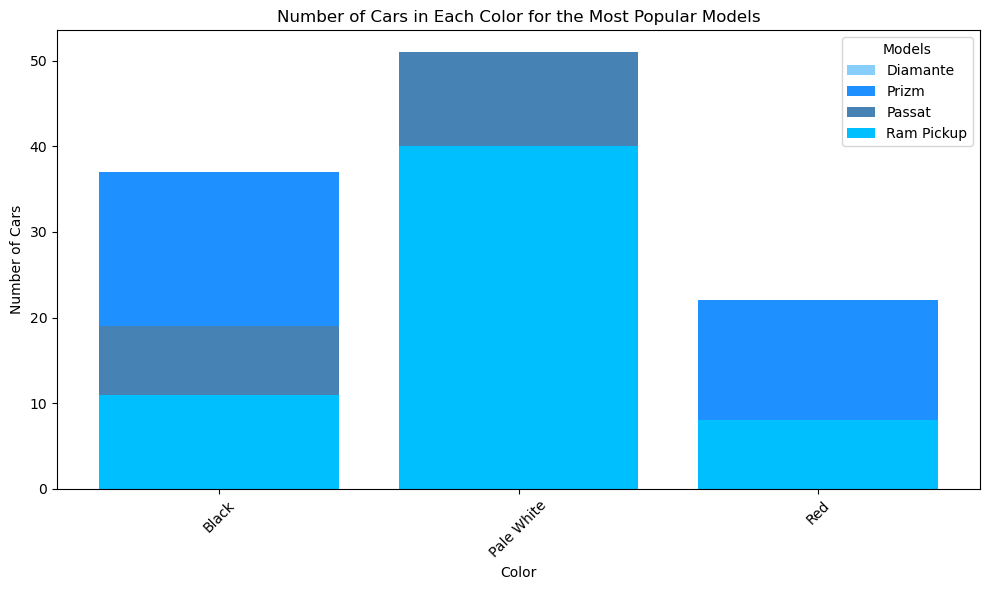

In [26]:
import matplotlib.pyplot as plt

blue_shades = ['#87CEFA', '#1E90FF', '#4682B4',  '#00BFFF',]

plt.figure(figsize=(10, 6))
models = color_count_for_popular_models['Model'].unique()

for i, model in enumerate(models):
    model_data = color_count_for_popular_models[color_count_for_popular_models['Model'] == model]
    plt.bar(model_data['Color'], model_data['Count'], label=model, color=blue_shades[i % len(blue_shades)])

plt.title('Number of Cars in Each Color for the Most Popular Models')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Third Task 

In [27]:
body_style_popularity = data.groupby('Body Style').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

print(body_style_popularity)


  Body Style  Count
3        SUV   6374
1  Hatchback   6128
4      Sedan   4488
2  Passenger   3945
0    Hardtop   2971


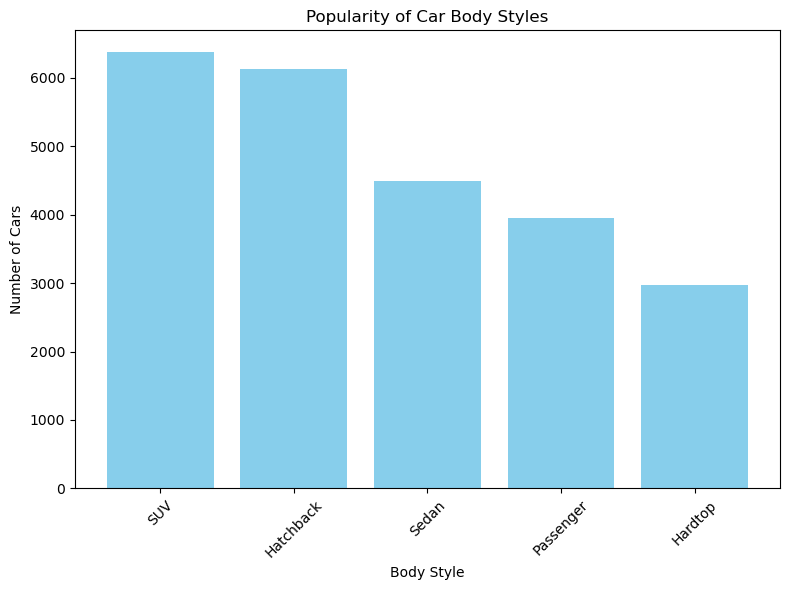

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(body_style_popularity['Body Style'], body_style_popularity['Count'], color='skyblue')
plt.title('Popularity of Car Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
max_income = data['Annual Income'].max()
min_income = data['Annual Income'].min()
mean_income = data['Annual Income'].mean()

print(f"Maximum Annual Income: {max_income}")
print(f"Minimum Annual Income: {min_income}")
print(f"Average Annual Income: {mean_income}")

Maximum Annual Income: 11200000
Minimum Annual Income: 10080
Average Annual Income: 830840.2851167071


In [30]:
import pandas as pd

bins = [10000, 100000, 500000, 1000000, 5000000, 11200000]
labels = ['Very Low Income', 'Low Income', 'Middle Income', 'High Income', 'Very High Income']

data['Income Group'] = pd.cut(data['Annual Income'], bins=bins, labels=labels, right=False)

income_body_style_counts = data.groupby(['Income Group', 'Body Style']).size().reset_index(name='Car Count')

print(income_body_style_counts)


        Income Group Body Style  Car Count
0    Very Low Income    Hardtop        609
1    Very Low Income  Hatchback       1331
2    Very Low Income  Passenger        911
3    Very Low Income        SUV       1418
4    Very Low Income      Sedan       1007
5         Low Income    Hardtop        289
6         Low Income  Hatchback        494
7         Low Income  Passenger        359
8         Low Income        SUV        585
9         Low Income      Sedan        375
10     Middle Income    Hardtop       1173
11     Middle Income  Hatchback       2209
12     Middle Income  Passenger       1422
13     Middle Income        SUV       2375
14     Middle Income      Sedan       1668
15       High Income    Hardtop        896
16       High Income  Hatchback       2085
17       High Income  Passenger       1248
18       High Income        SUV       1984
19       High Income      Sedan       1430
20  Very High Income    Hardtop          4
21  Very High Income  Hatchback          8
22  Very Hi

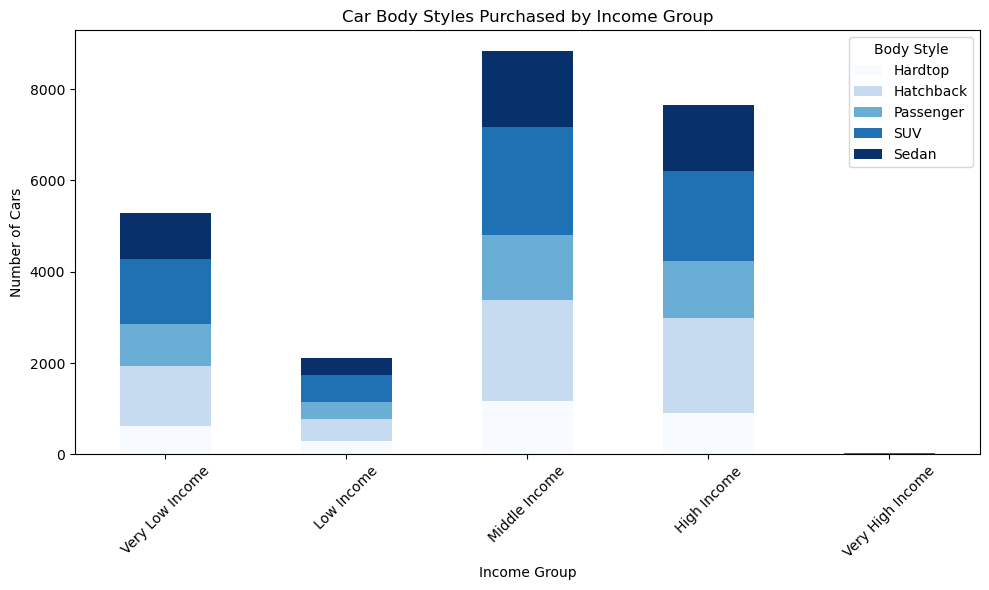

In [31]:
import matplotlib.pyplot as plt

pivot_data = income_body_style_counts.pivot(index='Income Group', columns='Body Style', values='Car Count')

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')

plt.title('Car Body Styles Purchased by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Body Style')

plt.show()


# Fourth Task

In [32]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [35]:
import pandas as pd

female_data = data[data['Gender'] == 'Female'].groupby(['Company', 'Model']).size().reset_index(name='Count')
top_female_cars = female_data.sort_values(by='Count', ascending=False).groupby('Company').head(1).nlargest(5, 'Count')

male_data = data[data['Gender'] == 'Male'].groupby(['Company', 'Model']).size().reset_index(name='Count')
top_male_cars = male_data.sort_values(by='Count', ascending=False).groupby('Company').head(1).nlargest(5, 'Count')

top_female_cars['Gender'] = 'Female'
top_male_cars['Gender'] = 'Male'

top_cars = pd.concat([top_female_cars, top_male_cars])

top_cars.reset_index(drop=True, inplace=True)
top_cars


,Company,Model,Count,Gender
0,Chevrolet,Prizm,98,Female
1,Acura,RL,93,Female
2,Volkswagen,Jetta,85,Female
3,Mitsubishi,Diamante,83,Female
4,Lexus,LS400,81,Female
5,Oldsmobile,Silhouette,341,Male
6,Mitsubishi,Diamante,335,Male
7,Dodge,Ram Pickup,314,Male
8,Chevrolet,Prizm,313,Male
9,Volkswagen,Passat,312,Male


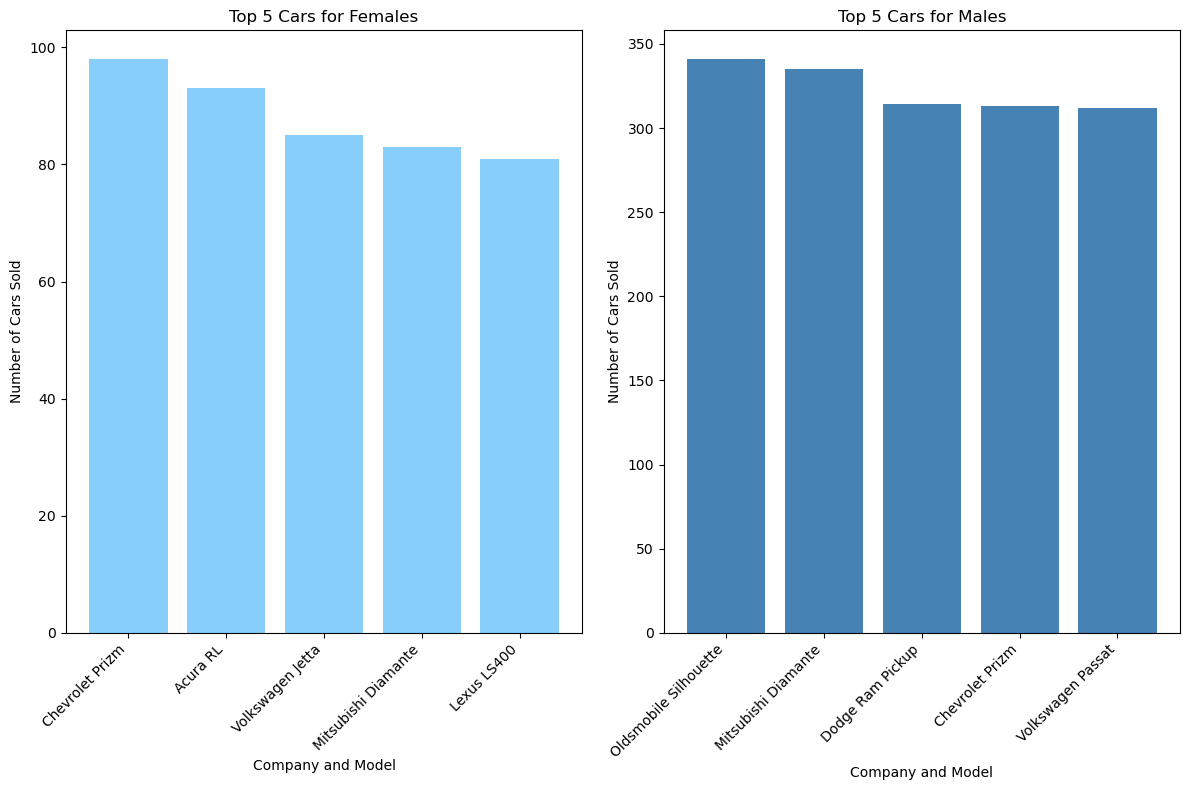

In [38]:
plt.figure(figsize=(12, 8))

blue_shades = ['#87CEFA', '#4682B4']

plt.subplot(1, 2, 1) 
female_cars = top_cars[top_cars['Gender'] == 'Female']
plt.bar(female_cars['Company'] + ' ' + female_cars['Model'], female_cars['Count'], color=blue_shades[0])
plt.title('Top 5 Cars for Females')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)  
male_cars = top_cars[top_cars['Gender'] == 'Male']
plt.bar(male_cars['Company'] + ' ' + male_cars['Model'], male_cars['Count'], color=blue_shades[1])
plt.title('Top 5 Cars for Males')
plt.xlabel('Company and Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [40]:
female_body_style = data[data['Gender'] == 'Female'].groupby('Body Style').size().reset_index(name='Count')
top_female_body_style = female_body_style.sort_values(by='Count', ascending=False).head(5)

male_body_style = data[data['Gender'] == 'Male'].groupby('Body Style').size().reset_index(name='Count')
top_male_body_style = male_body_style.sort_values(by='Count', ascending=False).head(5)

top_female_body_style['Gender'] = 'Female'
top_male_body_style['Gender'] = 'Male'

top_body_style = pd.concat([top_female_body_style, top_male_body_style])

top_body_style.reset_index(drop=True, inplace=True)
top_body_style


,Body Style,Count,Gender
0,SUV,1335,Female
1,Hatchback,1298,Female
2,Sedan,945,Female
3,Passenger,883,Female
4,Hardtop,647,Female
5,SUV,5039,Male
6,Hatchback,4830,Male
7,Sedan,3543,Male
8,Passenger,3062,Male
9,Hardtop,2324,Male


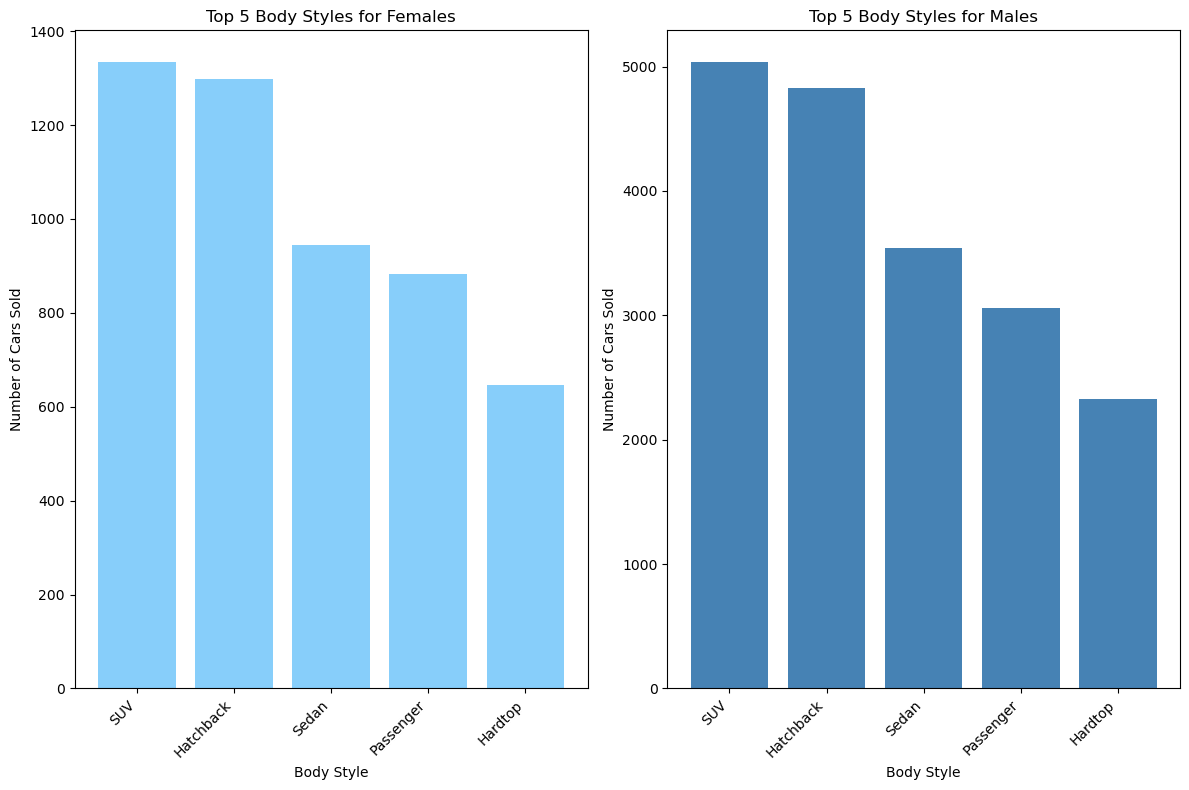

In [42]:
blue_shades = ['#87CEFA', '#4682B4']

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)  
female_body_style = top_body_style[top_body_style['Gender'] == 'Female']
plt.bar(female_body_style['Body Style'], female_body_style['Count'], color=blue_shades[0])
plt.title('Top 5 Body Styles for Females')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)  
male_body_style = top_body_style[top_body_style['Gender'] == 'Male']
plt.bar(male_body_style['Body Style'], male_body_style['Count'], color=blue_shades[1])
plt.title('Top 5 Body Styles for Males')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Fifth task

In [43]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Group
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low Income
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High Income
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High Income
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Very Low Income
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High Income


In [47]:
correlation = data['Annual Income'].corr(data['Price ($)'], method='pearson')

print(f"Correlation between Annual Income and Price: {correlation}")


Correlation between Annual Income and Price: 0.012064959420296463


In [46]:
bins = [10000, 100000, 500000, 1000000, 5000000, 11200000]
labels = ['Very Low Income', 'Low Income', 'Middle Income', 'High Income', 'Very High Income']
data['Income Group'] = pd.cut(data['Annual Income'], bins=bins, labels=labels, right=False)

income_group_analysis = data.groupby(['Income Group', 'Company', 'Model', 'Color', 'Body Style']).size().reset_index(name='Count')

print(income_group_analysis)


            Income Group Company   Model  Color Body Style  Count
0        Very Low Income   Acura   3-Sep  Black    Hardtop      0
1        Very Low Income   Acura   3-Sep  Black  Hatchback      0
2        Very Low Income   Acura   3-Sep  Black  Passenger      0
3        Very Low Income   Acura   3-Sep  Black        SUV      0
4        Very Low Income   Acura   3-Sep  Black      Sedan      0
...                  ...     ...     ...    ...        ...    ...
346495  Very High Income   Volvo  Xterra    Red    Hardtop      0
346496  Very High Income   Volvo  Xterra    Red  Hatchback      0
346497  Very High Income   Volvo  Xterra    Red  Passenger      0
346498  Very High Income   Volvo  Xterra    Red        SUV      0
346499  Very High Income   Volvo  Xterra    Red      Sedan      0

[346500 rows x 6 columns]
